In [20]:
using Pkg
Pkg.add("PlotlyJS")

   Resolving package versions...
  No Changes to `C:\Users\49157\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\49157\.julia\environments\v1.10\Manifest.toml`
Precompiling project...
  ✓ Parameters
  ✓ FunctionalCollections
  ✓ Kaleido_jll
  ✓ Mustache
  ✓ AssetRegistry
  ✓ PlotlyKaleido
  ✓ Widgets
  ✓ WebSockets
  ✓ Mux
  ✓ PlotlyBase
  ✓ WebIO
  ✓ JSExpr
  ✓ Blink
  ✓ PlotlyJS
  ✓ PlotlyJS → CSVExt
  ✓ PlotlyJS → DataFramesExt
  ✓ PlotlyJS → JSON3Ext
  17 dependencies successfully precompiled in 40 seconds. 193 already precompiled.


In [26]:
using Plots
using DataFrames
using JSON3
using JSONTables
#using PlotlyJS

In [2]:
#using just the first file to try out some plots
df = DataFrame()
json_file = JSON3.read("data/0.json")
selected_vars = [:classification, :description, :articles_count, :authors, :dependencies, :homepage,
:id, :keywords, :license_terms, :name, :operating_systems, :orms_id,:programming_languages,
:related_software, :source_code, :standard_articles, :zbmath_url]


for k in keys(json_file)
    temp_dict = copy(json_file[k])
    for var in selected_vars
        if temp_dict[var] == nothing
            temp_dict[var] = string()
        end
        if temp_dict[var] isa Array
            temp_dict[var] = join(temp_dict[var], ";")
        end
    end
    result = Dict{Symbol, Any}()

    for (k,v) in temp_dict
        if k in selected_vars
            push!(result, k=>v)
        end
    end
    temp_df = result |> DataFrame;
    append!(df,temp_df)
end

In [10]:
len_related_software = []
for row in df."related_software"
    row_array = split(row, ";")
    println(length(row_array))
    push!(len_related_software,length(row_array))
end


20
1
12
20
20
1
20
20
1
5
1
20
20
2
20
20
20
13
1
1
20
9
1
1
20
2
14
20
11
20
13
20
20
1
1
1
20
20
18
1
20
7
9
1
7
5
2
20
20
20
1
20
20
1
20
20
1
20
16
1
7
20
20
9
4
13
20
1
3
1
20
4
20
20
20
20
14
1
2
1
1
3
1
1
20
20
4
1
2
11
1
5
20
1
3
20
4
1
3
1
1
20
1
9
20
20
13
2
20
1
20
7
3
20
19
8
20
20
20
1
4
1
2
1
1
12
20
20
20
1
6
20
20
20
15
2
11
20
1
1
6
1
1
20
20
20
20
1
6
2
20
20
16
6
1
20
20
2
20
3
9
7
20
20
20
13
9
2
13
20
18
9
1
20
1
20
1
6
3
20
12
1
20
14
1
4
3
2
3
1
4
9
1
1
1
20
4
19
20
20
2
1
1
5
20
20
5
1
6
1
20
20
4
6
20
20
1
1
1
20
1
1
3
6
1
5
1
1
20
20
4
9
20
1
1
3
20
1
20
16
3
1
1
1
1
1
1
20
20
15
20
1
1
20
20
20
20
1
20
20
20
6
4
16
1
20
2
2
3
20
4
4
1
1
1
4
2
4
6
20
1
1
1
1
20
20
2
20
20
1
7
20
1
20
20
20
20
1
20
15
1
20
20
2
1
1
5
7
18
20
13
20
1
1
20
20
4
3
5
9
20
2
4
20
1
2
20
20
20
7
4
3
20
20
20
20
1
1
20
1
12
17
20
2
2
1
14
14
2
3
1
20
20
20
20
7
1
8
2
2
20
5
6
1
20
20
20
1
20
1
9
10
4
1
1
20
20
20
20
20
12
1
20
6
1
20
20
18
20
3
10
20
20
20
1
14
20
1
1
1
1
20
12
20
20


In [14]:
df[!,:len_related_software] = len_related_software

500-element Vector{Any}:
 20
  1
 12
 20
 20
  1
 20
 20
  1
  5
  ⋮
 20
 20
 20
 20
 20
 20
 20
  2
 20

In [15]:
println(size(df))

(500, 18)


In [30]:
id_col = convert(Array, df."id")
lrs_col = convert(Array, df."len_related_software")
lrs_col = sort(lrs_col)

500-element Vector{Any}:
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  ⋮
 20
 20
 20
 20
 20
 20
 20
 20
 20

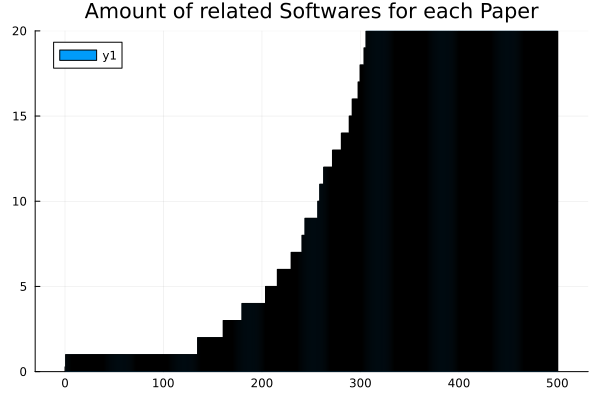

In [32]:
plot(bar(lrs_col), title="Amount of related Softwares for each Paper")